In [20]:
import sys
sys.path.append("..")

import os
from pathlib import Path
import logging

import numpy as np

import pycolmap
from hloc import reconstruction

from imc2023.utils.eval import eval
from imc2023.utils.utils import (
    create_submission,
    get_data_from_dir,
)

In [21]:
MODEL_NAME = "ALIKED-rot-pixsfm-sci"
# MODEL_NAME = "DISK+SP+SG-rot-pixsfm-sci"

dataset = "urban"
scene = "kyiv-puppet-theater"

In [22]:
image_dir = Path(f"../image-matching-challenge-2023/train/{dataset}/{scene}/images")

sfm_dir = Path("../test")

pairs_path = Path(f"../outputs/{MODEL_NAME}/{dataset}/{scene}/pairs.txt")
features_path = Path(f"../outputs/{MODEL_NAME}/{dataset}/{scene}/features.h5")
matches_path = Path(f"../outputs/{MODEL_NAME}/{dataset}/{scene}/matches.h5")

ref_model = Path(f"../image-matching-challenge-2023/train/{dataset}/{scene}/sfm")

In [23]:
data_dir = "../image-matching-challenge-2023"
data_dict = get_data_from_dir(data_dir, "train")

img_list = [Path(p).name for p in data_dict[dataset][scene]]
len(img_list)

27

In [24]:
sparse_model1 = reconstruction.main(
    sfm_dir=sfm_dir,
    image_dir=image_dir,
    pairs=pairs_path,
    features=features_path,
    matches=matches_path,
    camera_mode=pycolmap.CameraMode.SINGLE,
    image_list=img_list,
    # reference_model=ref_model,
    # verbose=True,
)

out_results = {
    dataset: {
        scene: {},
    },
}

if sparse_model1 is not None:
    for _, im in sparse_model1.images.items():
        img_name = os.path.join(dataset, scene, "images", im.name)
        # problem: tvec is a reference! --> force copy
        out_results[dataset][scene][img_name] = {"R": im.rotmat(), "t": np.array(im.tvec)}
else:
    print("No sparse model found!")

create_submission(out_results, data_dict, "../test/submission.csv")
scores = eval(submission_csv="../test/submission.csv", data_dir=data_dir, verbose=False, return_dict=True)

print(scores[dataset][scene])

[2023/06/05 10:10:39 hloc WARNING] The database already exists, deleting it.
[2023/06/05 10:10:39 hloc INFO] Creating an empty database...
[2023/06/05 10:10:39 hloc INFO] Importing images into the database...
[2023/06/05 10:10:39 hloc INFO] Importing features into the database...
100%|█████████████████████████████████████████| 25/25 [00:00<00:00, 1951.89it/s]
[2023/06/05 10:10:39 hloc INFO] Importing matches into the database...
  5%|█▊                                      | 16/351 [00:00<00:00, 1652.89it/s]


KeyError: 'IMG_20220127_170709.jpg'

In [ ]:
sparse_model2 = reconstruction.main(
    sfm_dir=sfm_dir,
    image_dir=image_dir,
    pairs=pairs_path,
    features=features_path,
    matches=matches_path,
    camera_mode=pycolmap.CameraMode.SINGLE,
    image_list=img_list,
    reference_model=ref_model,
    # verbose=True,
)

out_results = {
    dataset: {
        scene: {},
    },
}

if sparse_model2 is not None:
    for _, im in sparse_model2.images.items():
        img_name = os.path.join(dataset, scene, "images", im.name)
        # problem: tvec is a reference! --> force copy
        out_results[dataset][scene][img_name] = {"R": im.rotmat(), "t": np.array(im.tvec)}
else:
    print("No sparse model found!")
    
create_submission(out_results, data_dict, "../test/submission.csv")
scores = eval(submission_csv="../test/submission.csv", data_dir=data_dir, verbose=False, return_dict=True)

print(scores[dataset][scene])

[2023/06/05 10:04:35 hloc WARNING] The database already exists, deleting it.
[2023/06/05 10:04:35 hloc INFO] Creating an empty database...
[2023/06/05 10:04:35 hloc INFO] Importing images into the database...
[2023/06/05 10:04:40 hloc INFO] Importing features into the database...
100%|█████████████████████████████████████████| 30/30 [00:00<00:00, 1396.91it/s]
[2023/06/05 10:04:40 hloc INFO] Importing matches into the database...
100%|███████████████████████████████████████| 435/435 [00:00<00:00, 1912.19it/s]
[2023/06/05 10:04:41 hloc INFO] Performing geometric verification of the matches...
100%|██████████| 29/29 [00:02<00:00, 10.76it/s]
[2023/06/05 10:04:44 hloc INFO] mean/med/min/max valid matches 27.24/0.00/0.00/100.00%.
[2023/06/05 10:04:44 hloc INFO] Running 3D reconstruction...
[2023/06/05 10:04:56 hloc INFO] Reconstructed 1 model(s).
[2023/06/05 10:04:56 hloc INFO] Largest model is #0 with 27 images.
[2023/06/05 10:04:56 hloc INFO] Reconstruction statistics:
Reconstruction:
	num

{'mAA': 0.8066666722297668, 'mAA_q': 0.8068965673446655, 'mAA_t': 0.833793044090271}


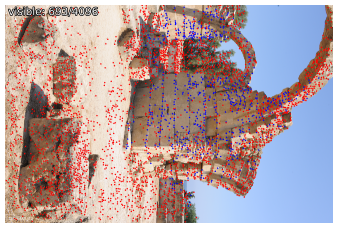

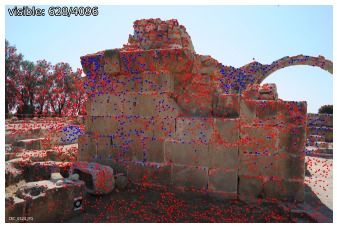

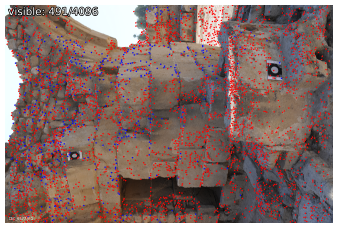

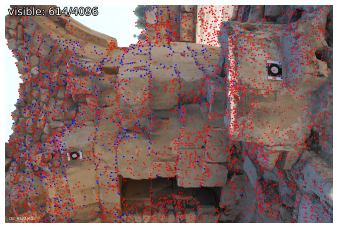

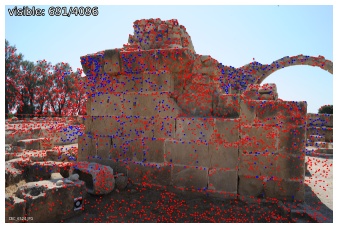

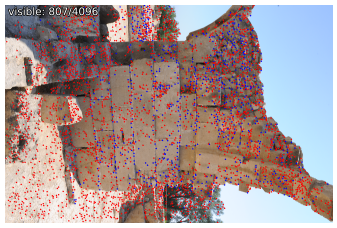

In [ ]:
from hloc import visualization

visualization.visualize_sfm_2d(sparse_model1, image_dir, color_by='visibility', n=3, dpi=50)
visualization.visualize_sfm_2d(sparse_model2, image_dir, color_by='visibility', n=3, dpi=50)